In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("/Users/riadobriyal/Desktop/Somnifit/backend/datasets/final_dataset.csv")
df.head()

,Weight,Height,BMI,Gender,Age,BMIcase,Exercise Recommendation Plan
0,92.085190,1.760250,29.719488,Female,59,over weight,5
1,61.089124,1.595499,23.997776,Female,25,normal,4
2,82.454037,1.816538,24.987499,Female,50,normal,4
3,101.713306,1.790696,31.720047,Female,62,obese,6
4,99.609527,1.969726,25.673756,Male,57,over weight,5


In [2]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Weight                        5000 non-null   float64
 1   Height                        5000 non-null   float64
 2   BMI                           5000 non-null   float64
 3   Gender                        5000 non-null   object 
 4   Age                           5000 non-null   int64  
 5   BMIcase                       5000 non-null   object 
 6   Exercise Recommendation Plan  5000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 273.6+ KB


Weight                          0
Height                          0
BMI                             0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64

In [3]:
df.describe()

,Weight,Height,BMI,Age,Exercise Recommendation Plan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,79.760954,1.761265,25.900955,41.956000,4.823400
std,17.359682,0.129611,5.678326,14.030361,1.522589
min,50.002978,1.390171,12.791453,18.000000,1.000000
25%,64.705890,1.703790,21.501848,30.000000,4.000000
50%,79.536451,1.776202,26.314692,42.000000,5.000000
75%,95.102506,1.848437,30.741264,54.000000,6.000000
max,109.998871,1.979633,34.997098,65.000000,7.000000


In [4]:
df.duplicated().sum()


0

In [6]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

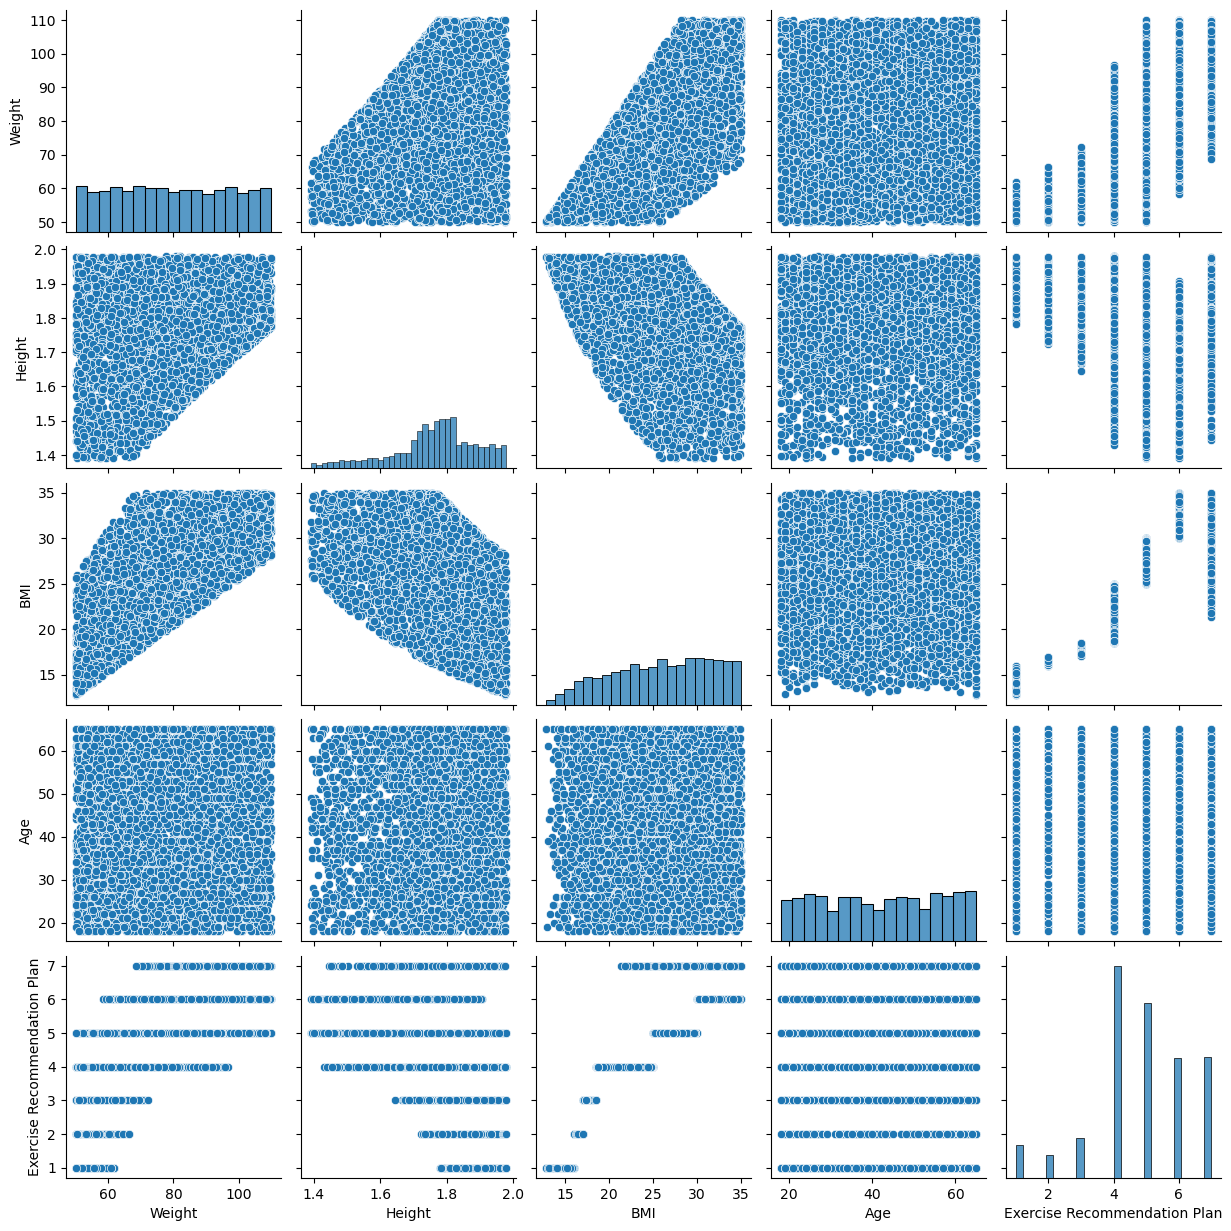

In [7]:
import seaborn as sns
sns.pairplot(df)

In [8]:
df["BMIcase"].unique()

array(['over weight', 'normal', 'obese', 'severe obese', 'sever thinness',
       'mild thinness', 'moderate thinness'], dtype=object)

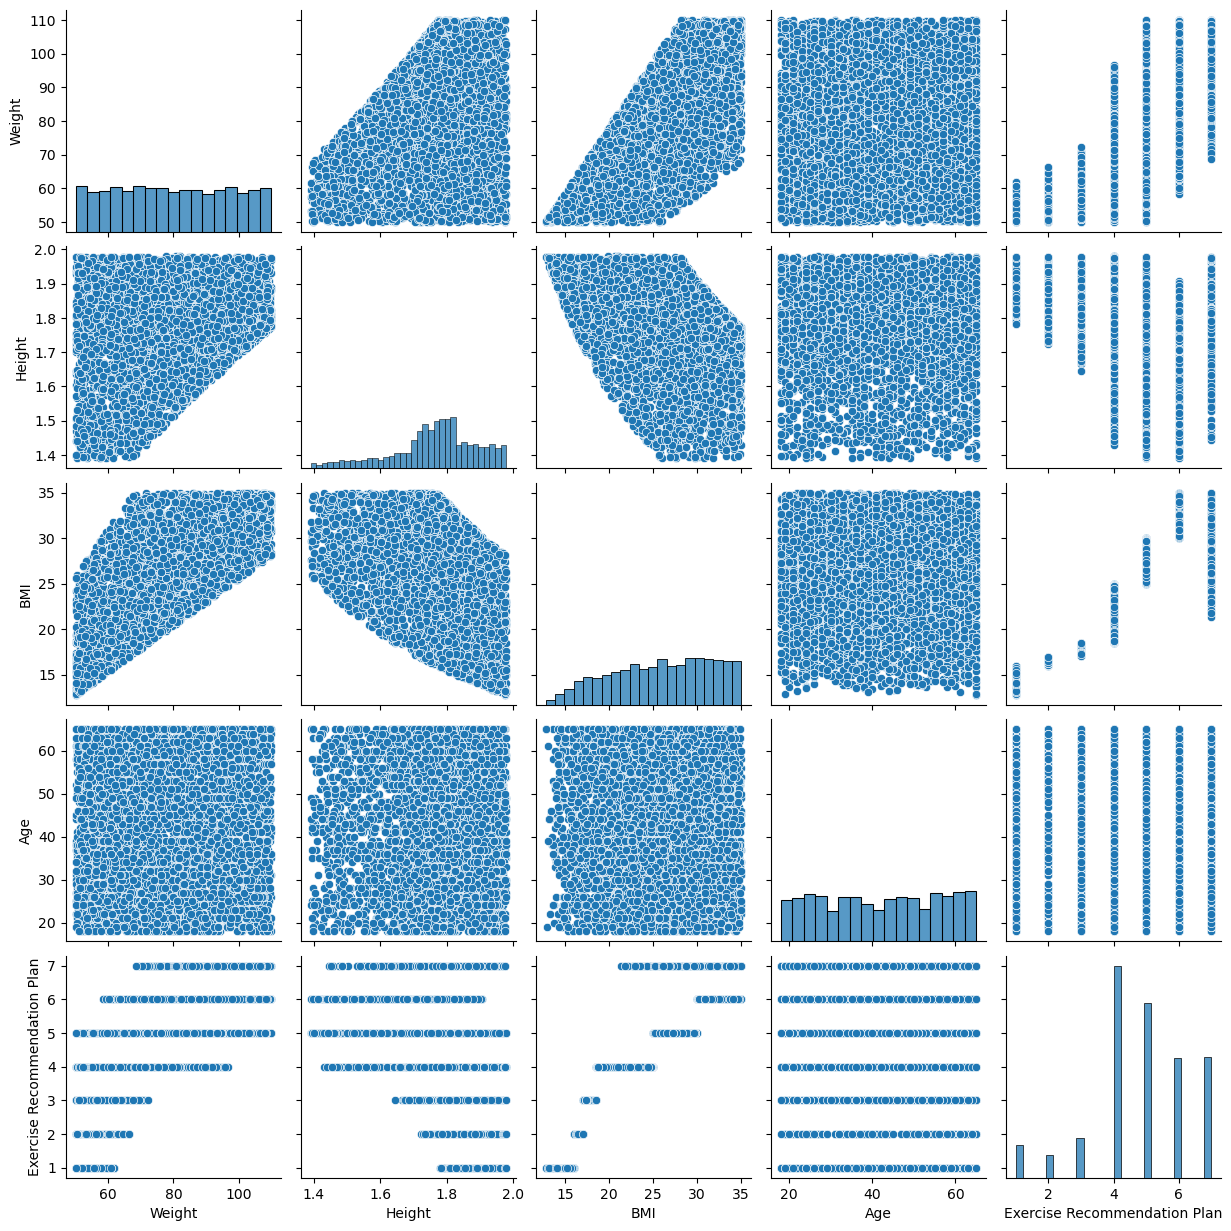

In [9]:
sns.pairplot(df)